In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import json
import seaborn as sns
from scipy.stats import wilcoxon



conditions = {
    "fimo": {
        "fimo_0.0001_1000": "FIMO 4 1kb",
        "fimo_0.0001_3000": "FIMO 4 3kb",
        "cbust_6_1000_onlyfiveup": "CB 6 1kb",
        "cbust_6_1000_allindown": "CB 6 1kb all",
        "cbust_6_3000_onlyfiveup": "CB 6 3kb",
        "cbust_6_3000_allindown": "CB 6 3kb all",
        "cbust_6_5000_onlyfiveup": "CB 6 5kb",
        "cbust_6_5000_allindown": "CB 6 5kb all",
        

    }
}
working_folder = "data/chlpcomparation/"


def rankPositionCalc(lenghtResult, tfRanking):

    return 1 - (tfRanking / lenghtResult)


def getpositions(parameters, tf):
    resultdf = pd.read_csv(working_folder + parameters)
    #     resultdf = resultdf.drop(resultdf[resultdf.SScore < score].index)
    resultdf = resultdf.sort_values(by=["SScore"], ascending=False, ignore_index=True)
    lenghtResult = len(resultdf.index)

    firsOfFamilyDone = False
    tfRankingDone = False
    for index, id in resultdf.iterrows():
        if not tfRankingDone and id.tf.strip() == tf:
#             print(id.tf.strip(), id.tffamily.strip())
            tfRanking = index
            tfRankingDone = True
            #             print(tf, tfRanking)
            rankposition = rankPositionCalc(lenghtResult, tfRanking)
            break

    #         if not firsOfFamilyDone and id.tffamily.strip() == 'AP2-ANT':
    #             firsOfFamily = index
    #             firsOfFamilyDone = True

    if not tfRankingDone:
        tfRanking = None
        rankposition = 0
    #     if not firsOfFamilyDone:
    #         firsOfFamily = None
    return rankposition

def performCurve(exp, similars):
    ##################
    # Define the name of the case you want to study acording to file names
    with open("data/tfnames_andChlp.json") as fp:
        tfNames = json.load(fp)["tfs"]

    parameters = exp
    case ="0Negatives"
    ###############
    plotScores = {'ChlP': {},'TDTHub': {}}
    
    rankingScores = []
    for tf in tfNames:
        plotScores['ChlP'][tf["name"]] = []
        plotScores['TDTHub'][tf["name"]] = []
        for replicate in range(1,11):
            if tf["name"] == "HSF1b-NS" or tf["name"] == "PIF1" :
                continue
            allPosibleScoresInvitro = []
            allPosibleScoresChlp = []
            experimentName = "{}/Arabidopsis_thaliana_{}Athaliana{}{}_{}.csv".format(
                tf["name"],str(replicate),tf["name"], case, parameters
            )

            if len(tf["dataBaseNames"]) > 0 and len(tf["chlpname"]) > 0:

                for name in tf["dataBaseNames"]:
                    allPosibleScoresInvitro.append(getpositions(experimentName, name))

                for name in tf["chlpname"]:
                    allPosibleScoresChlp.append(getpositions(experimentName, name))


            if len(tf["dataBaseSimilarsNames"]) > 0 and similars:
                for name in tf["dataBaseSimilarsNames"]:
                    allPosibleScores.append(getpositions(experimentName, name))

            if len(allPosibleScoresChlp) != 0 and len(allPosibleScoresInvitro) != 0:
                plotScores['TDTHub'][tf["name"]].append(max(allPosibleScoresInvitro))
                plotScores['ChlP'][tf["name"]].append(max(allPosibleScoresChlp))
   
    return plotScores
diferentConditions = []
wilcoxResults = []
for conditionGroup in conditions:
    matplotlib.rcParams.update({'font.size': 14})

    matplotlib.rcParams.update({'font.size': 13})
    print(conditionGroup)
    for condition in conditions[conditionGroup]:
        print(condition)

        representationRanking = performCurve(
            condition, False
        ) #true similars yes false no
#         print(representationRanking)
#         for aproach in representationRanking:
#             for tf in representationRanking[aproach]:
#                 print(aproach, tf, np.std(representationRanking[aproach][tf]))
        wilcoxValues = {}
        for aproach in representationRanking:
            wilcoxValues[aproach] = []
            for tf in representationRanking[aproach]:
                if len(representationRanking[aproach][tf]) != 10:
                    continue
                x = np.mean(representationRanking[aproach][tf])
                wilcoxValues[aproach].append(x)
                diferentConditions.append((conditions[conditionGroup][condition],aproach,x))
        w, p = wilcoxon(wilcoxValues['TDTHub'],wilcoxValues['ChlP'])
        wilcoxResults.append((conditions[conditionGroup][condition], w, p))
        
dataFrameFinal = pd.DataFrame.from_records(diferentConditions, columns=["Parameters", "PWMs","1-Ranking"])
dataFrameFinal.to_csv('elfilegood.csv', index=False)

fimo
fimo_0.0001_1000
fimo_0.0001_3000
cbust_6_1000_onlyfiveup
cbust_6_1000_allindown
cbust_6_3000_onlyfiveup
cbust_6_3000_allindown
cbust_6_5000_onlyfiveup
cbust_6_5000_allindown


In [ ]:
sns.boxplot(**hue_plot_params)

FIMO 4 3kb_ChlP vs. FIMO 4 3kb_TDTHub: Wilcoxon test (paired samples), P_val:3.015e-02 Stat=1.950e+02
FIMO 4 1kb_ChlP vs. FIMO 4 1kb_TDTHub: Wilcoxon test (paired samples), P_val:5.166e-03 Stat=1.550e+02


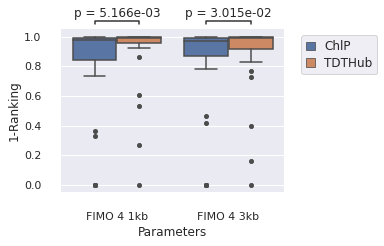

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
dataFrameFinal = pd.read_csv('elfile.csv')

# plt.style.use('ggplot')
# sns.color_palette("YlGnBu", n_colors=5)
hue_plot_params = {
    'data':dataFrameFinal,
    'x':'Parameters', 
    'y':'1-Ranking',
    "hue":"PWMs"
    }
sns.set(rc={'figure.figsize':(4,3)})
ax = sns.boxplot(**hue_plot_params,flierprops={"marker":'o', "markersize":4})

pairs = [
    (("FIMO 4 1kb", "ChlP"), ("FIMO 4 1kb", "TDTHub")),
    (("FIMO 4 3kb", "ChlP"), ("FIMO 4 3kb", "TDTHub"))
]

annotator = Annotator(ax, pairs, data=dataFrameFinal, x='Parameters', y='1-Ranking',hue="PWMs")
annotator.configure(test='Wilcoxon', text_format='full', show_test_name=False, loc='outside') # text_format='star', loc='outside'
annotator.apply_and_annotate()

plt.legend(bbox_to_anchor=(1.05, 1), prop={"size": 12}, handlelength=0.7, labelspacing=0.3)

sns.despine(offset=10, trim=True)
plt.savefig('lcooo2.png',
        dpi=300,
        bbox_inches="tight",
        )
# add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
#                     box_pairs=[(("Thur", "No"), ("Fri", "No")),
#                                  (("Sat", "Yes"), ("Sat", "No")),
#                                  (("Sun", "No"), ("Thur", "Yes"))
#                                 ],
#                     test='t-test_ind', text_format='full', loc='inside', verbose=2)
    
    
#     ax.bar_label(container)




FIMO 4 3kb_ChlP vs. FIMO 4 3kb_TDTHub: Wilcoxon test (paired samples), P_val:3.015e-02 Stat=1.950e+02
FIMO 4 1kb_ChlP vs. FIMO 4 1kb_TDTHub: Wilcoxon test (paired samples), P_val:5.166e-03 Stat=1.550e+02
CB 6 1kb_ChlP vs. CB 6 1kb_TDTHub: Wilcoxon test (paired samples), P_val:1.484e-01 Stat=2.410e+02
CB 6 1kb all_ChlP vs. CB 6 1kb all_TDTHub: Wilcoxon test (paired samples), P_val:2.368e-02 Stat=1.890e+02
CB 6 3kb_ChlP vs. CB 6 3kb_TDTHub: Wilcoxon test (paired samples), P_val:4.993e-01 Stat=2.900e+02
CB 6 3kb all_ChlP vs. CB 6 3kb all_TDTHub: Wilcoxon test (paired samples), P_val:2.925e-01 Stat=2.660e+02
CB 6 5kb_ChlP vs. CB 6 5kb_TDTHub: Wilcoxon test (paired samples), P_val:4.894e-01 Stat=2.890e+02
CB 6 5kb all_ChlP vs. CB 6 5kb all_TDTHub: Wilcoxon test (paired samples), P_val:3.790e-01 Stat=2.770e+02


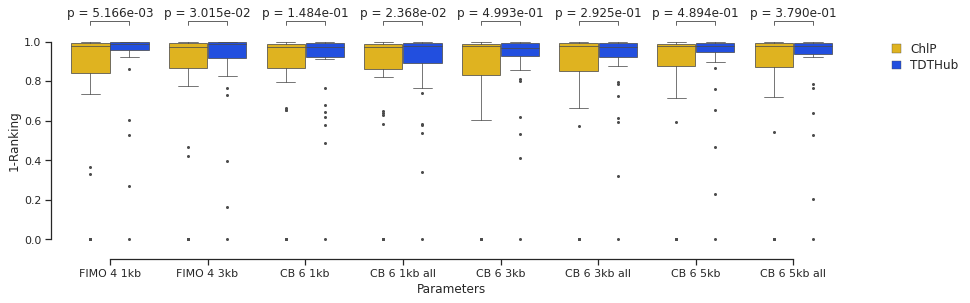

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set_theme(style="ticks", palette="bright")
sns.set_context(rc={"lines.linewidth":0.75})
# sns.set(rc={'figure.figsize':(3.5,3), "lines.linewidth":0.7})
# sns.set(rc={'figure.figsize':(7,3)})

dataFrameFinal = pd.read_csv('elfilegood.csv')
hue_plot_params = {
    'data':dataFrameFinal,
    'x':'Parameters', 
    'y':'1-Ranking',
    "hue":"PWMs"
    }



with sns.axes_style("ticks"):
    
    ax = sns.boxplot(**hue_plot_params,flierprops={"marker":'o', "markersize":2},  palette=["y", "b"])
    sns.set(rc={'figure.figsize':(13,4)})

pairs = [
    (("FIMO 4 1kb", "ChlP"), ("FIMO 4 1kb", "TDTHub")),
    (("FIMO 4 3kb", "ChlP"), ("FIMO 4 3kb", "TDTHub")),
    (("CB 6 1kb", "ChlP"), ("CB 6 1kb", "TDTHub")),
    (("CB 6 1kb all", "ChlP"), ("CB 6 1kb all", "TDTHub")),
    (("CB 6 3kb", "ChlP"), ("CB 6 3kb", "TDTHub")),
    (("CB 6 3kb all", "ChlP"), ("CB 6 3kb all", "TDTHub")),
    (("CB 6 5kb", "ChlP"), ("CB 6 5kb", "TDTHub")),
    (("CB 6 5kb all", "ChlP"), ("CB 6 5kb all", "TDTHub"))
]

annotator = Annotator(ax, pairs, data=dataFrameFinal, x='Parameters', y='1-Ranking',hue="PWMs")
annotator.configure(test='Wilcoxon', text_format='full', line_width=0.75, show_test_name=False, loc='outside') # text_format='star', loc='outside'
annotator.apply_and_annotate()
plt.legend(bbox_to_anchor=(1.05, 1), prop={"size": 12}, handlelength=0.7, labelspacing=0.3, frameon=False)
sns.despine(offset=10, trim=True)
plt.savefig('elbuenoFinalTOTAL.png',
        dpi=300,
        bbox_inches="tight",
        )

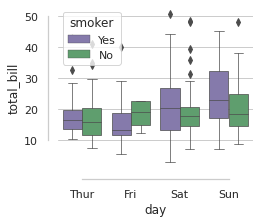

In [8]:

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(3.5,3), "lines.linewidth":0.7})

# Load the example tips dataset
tips = sns.load_dataset("tips")
with sns.axes_style("whitegrid"):
    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(x="day", y="total_bill",
                hue="smoker", palette=["m", "g"],
                data=tips)
    sns.despine(offset=10, trim=True)

